In [1]:
import astropy.units as u
import matplotlib.pyplot as plt

import pint.fitter
from pint.models import get_model_and_toas
from pint.residuals import Residuals
import pint.logging

pint.logging.setup(level="INFO")

1

In [2]:

parfile= "J0835-4510.par"
timfile= "J0835-4510.tim"

m, t_all = get_model_and_toas(parfile, timfile)
m

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'EPHVER 5'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEF 0.476782'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'TNGLOBALEQ -3.67931'
WARNING  (pint.models.model_builder     ): UNITS is not specified. Assuming TDB...
INFO     (pint.toa                      ): Using CLOCK = TT(TAI), so setting include_bipm = False
INFO     (pint.observatory              ): Applying GPS to UTC clock correction (~few nanoseconds)
INFO     (pint.observatory              ): Loading global GPS clock file
INFO     (pint.observatory              ): Using global clock file for gps2utc.clk with bogus_last_correction=False
INFO     (pint.observatory         

TimingModel(
  AbsPhase(
    MJDParameter(   TZRMJD              57522.2281783717468866 (d) frozen=True),
    strParameter(   TZRSITE             mo                frozen=True),
    floatParameter( TZRFRQ              834.752014        (MHz) frozen=True)),
  AstrometryEquatorial(
    MJDParameter(   POSEPOCH            57600.0000000000000000 (d) +/- 0.0 d frozen=True),
    floatParameter( PX                  0.0               (mas) frozen=True),
    AngleParameter( RAJ                 8:35:20.63268500  (hourangle) +/- 0h00m00.22879s frozen=False),
    AngleParameter( DECJ                -45:10:33.80438000 (deg) +/- 0d00m01.0323s frozen=False),
    floatParameter( PMRA                -49.68            (mas / yr) +/- 0.06 mas / yr frozen=True),
    floatParameter( PMDEC               29.9              (mas / yr) +/- 0.1 mas / yr frozen=True)),
  DispersionDM(
    floatParameter( DM                  67.99             (pc / cm3) +/- 0.01 pc / cm3 frozen=True),
    floatParameter( DM1      

In [12]:
from pint.models import (
    parameter as p,
)

f2 = p.prefixParameter(
    parameter_type="float",
    name="F2",
    value=0.0,
    units=u.Hz / (u.s) ** 2,
    longdouble=True,
)

In [13]:
m.components["Spindown"].add_param(f2, setup=True)

ValueError: Tried to add a second parameter called F2. Old value: floatParameter( F2                  2e-20             (Hz / s2) frozen=False) New value: floatParameter( F2                  0.0               (Hz / s2) frozen=True)

In [14]:
m.F2.quantity = 2e-22 * u.Hz / u.s**2
m.F2.frozen= False

In [15]:
m.validate()

m

TimingModel(
  AbsPhase(
    MJDParameter(   TZRMJD              57522.2281783717468866 (d) frozen=True),
    strParameter(   TZRSITE             mo                frozen=True),
    floatParameter( TZRFRQ              834.752014        (MHz) frozen=True)),
  AstrometryEquatorial(
    MJDParameter(   POSEPOCH            57600.0000000000000000 (d) +/- 0.0 d frozen=True),
    floatParameter( PX                  0.0               (mas) frozen=True),
    AngleParameter( RAJ                 8:35:20.63268500  (hourangle) +/- 0h00m00.22879s frozen=False),
    AngleParameter( DECJ                -45:10:33.80438000 (deg) +/- 0d00m01.0323s frozen=False),
    floatParameter( PMRA                -49.68            (mas / yr) +/- 0.06 mas / yr frozen=True),
    floatParameter( PMDEC               29.9              (mas / yr) +/- 0.1 mas / yr frozen=True)),
  DispersionDM(
    floatParameter( DM                  67.99             (pc / cm3) +/- 0.01 pc / cm3 frozen=True),
    floatParameter( DM1      

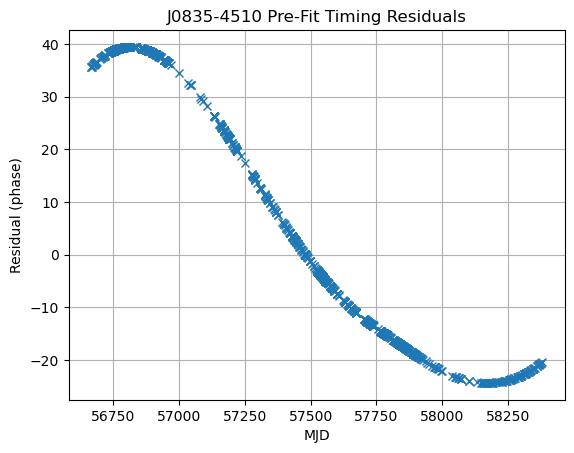

In [16]:
rs = Residuals(t_all, m).phase_resids
xt = t_all.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

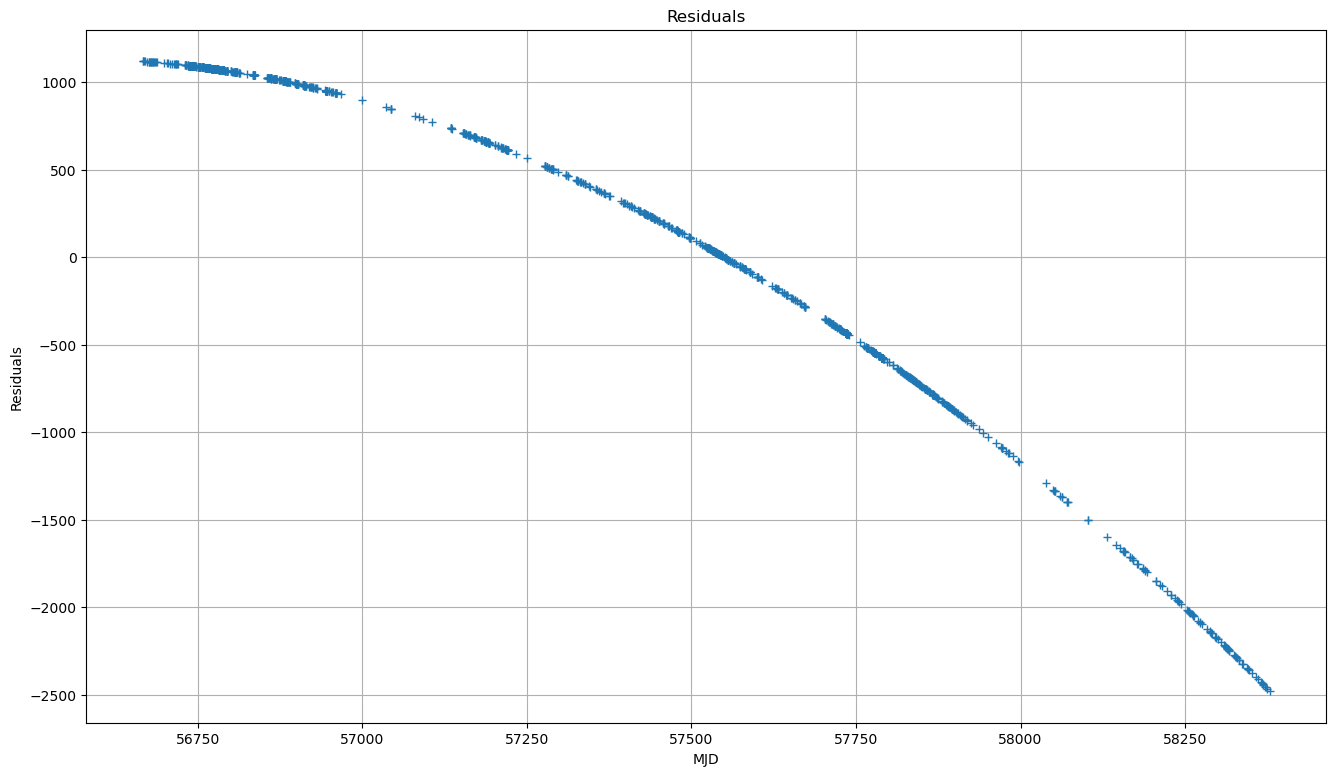

In [17]:
f = pint.fitter.WLSFitter(t_all, m)
f.fit_toas()
f.plot()

In [18]:
f.print_summary()

Fitted model using weighted_least_square method with 14 free parameters to 1420 TOAs
Prefit residuals Wrms = 1396045.7008661404 us, Postfit residuals Wrms = 555481395.2534218 us
Chisq = 1412664895462665728.000 for 1405 d.o.f. for reduced Chisq of 1005455441610438.250

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J0835-4510 J0835-4510                   None
TRACK                            -2 -2                           None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       56666.6                      56666.6 d 
FINISH                        58379                        58379 d 
DILATEFREQ                        N                              None
DMDATA                           

In [19]:
t_all.print_summary()

Number of TOAs:  1420
Number of commands:  2
Number of observatories: 1 ['most']
MJD span:  56666.641 to 58378.952
Date span: 2014-01-09 15:22:43.372552885 to 2018-09-17 22:50:24.049688160
most TOAs (1420):
  Min freq:      828.670 MHz
  Max freq:      842.659 MHz
  Min error:     0.361 us
  Max error:     475 us
  Median error:  4.98 us



In [20]:
error_ok = t_all.table["error"] <= 100* u.us
t = t_all[error_ok]
t.print_summary()



Number of TOAs:  1379
Number of commands:  2
Number of observatories: 1 ['most']
MJD span:  56666.641 to 58378.952
Date span: 2014-01-09 15:22:43.372552885 to 2018-09-17 22:50:24.049688160
most TOAs (1379):
  Min freq:      828.670 MHz
  Max freq:      842.659 MHz
  Min error:     0.361 us
  Max error:     97.8 us
  Median error:  4.83 us



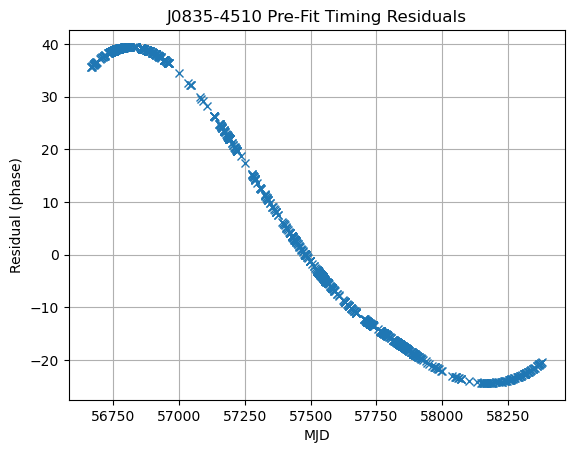

In [21]:
rs = Residuals(t, m).phase_resids
xt = t.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [22]:
f = pint.fitter.WLSFitter(t, m)
f.fit_toas(maxiter=100,debug=True)

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*Offset + 0.9560657065662371*GLF0D_1 + 4.36402117797662e-11*GLF0_3 + -4.0982281171357393e-11*GLF0D_3 + -9.474478076721612e-10*F2 + -2.0080445480426942e-05*F1 + -6.732791193229782e-05*GLTD_1 + -0.27774632108974967*F0
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0_3 + 9.925768259672296e-07*Offset + 9.488920951469917e-07*GLF0D_1 + 1.3023619640925612e-10*GLF1_2 + 8.840836336534533e-11*GLF0_2 + 6.376349012759299e-11*GLTD_1 + -1.5288104965672985e-11*F2 + -5.941448101945235e-11*F1 + -2.7572271099593093e-07*F0 + -0.0006049887303170089*GLTD_3 + -0.0006052706698000428*GLF1_3 + -0.9989690625091167*GLF0D_3
WARNING  (pint.logging                  ): D:

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0_3 + 0.08393176711491236*Offset + 0.08024904802547682*GLF0D_1 + 6.321409959650359e-08*GLTD_3 + -1.6113961429923253e-09*GLF1_3 + -8.196794151726758e-08*F1 + -2.7482754643136193e-07*GLTD_1 + -0.023308827330557003*F0 + -0.999999998520928*GLF0D_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0D_3 + 0.3103073133710457*Offset + 0.29669236443959757*GLF0D_1 + 1.1902749906742214e-07*GLTD_3 + -1.6895852174582834e-09*GLF1_3 + -1.107769585270766e-07*F1 + -3.7143234280765413e-07*GLTD_1 + -0.08617559862858552*F0 + -0.999999990884535*GLF0_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarnin

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0_3 + 0.03690053466025791*F0 + 6.644624662422019e-08*GLTD_1 + 2.619903229499876e-08*GLTD_3 + 1.98174738335265e-08*F1 + -3.6004282555044742e-09*GLF1_3 + -0.12704441867534152*GLF0D_1 + -0.13287428832197962*Offset + -0.9999999964122089*GLF0D_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*Offset + 0.9561243552905431*GLF0D_1 + 0.300804459546011*GLF0D_3 + 2.000485864641361e-08*GLTD_3 + -8.151296193775315e-10*GLF1_3 + -3.401807099598383e-07*F1 + -1.1406157258593498e-06*GLTD_1 + -0.27771046778615166*F0 + -0.3008044603170443*GLF0_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Par

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.6823289323562706*GLF0_3 + 0.27771013715966253*F0 + 5.302917651753532e-07*GLTD_1 + 1.5815495855727768e-07*F1 + 1.727907911309212e-08*GLTD_3 + -2.616215886983933e-09*GLF1_3 + -0.6823289301110738*GLF0D_3 + -0.9561248961029704*GLF0D_1 + -1.0*Offset
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.6386754557427438*GLF0D_3 + 0.2777108909162883*F0 + 1.921698791861348e-06*GLTD_1 + 5.731346870248917e-07*F1 + 1.0932904382590522e-07*GLTD_3 + -7.145899082532814e-10*GLF1_3 + -0.6386754564282984*GLF0_3 + -0.9561236631657802*GLF0D_1 + -1.0*Offset
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Param

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.9999999974118278*GLF0_3 + 0.18594328490769585*Offset + 0.17778506003520014*GLF0D_1 + 2.52704279534437e-09*GLF1_3 + -1.0535518384512563e-08*F1 + -3.532574741688661e-08*GLTD_1 + -7.120706599190477e-08*GLTD_3 + -0.05163830087644526*F0 + -1.0*GLF0D_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0D_3 + 0.02498839192704842*Offset + 0.02389199957074585*GLF0D_1 + 6.076639635397125e-09*GLF1_3 + -1.2051465780267555e-08*F1 + -1.7797813412755203e-08*GLTD_3 + -4.040843002148684e-08*GLTD_1 + -0.006939544461023929*F0 + -0.9999999991938996*GLF0_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarnin

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.7423438990526227*GLF0_3 + 0.27770941831823476*F0 + 1.6962524753641462e-08*GLTD_3 + -3.149652320973536e-09*GLF1_3 + -2.3760122796656395e-07*F1 + -7.966698563977532e-07*GLTD_1 + -0.7423438989827896*GLF0D_3 + -0.9561260719363639*GLF0D_1 + -1.0*Offset
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*Offset + 0.9561249270842194*GLF0D_1 + 0.3091015663663402*GLF0D_3 + 3.5941085408799686e-10*GLF1_3 + -2.7051388323828315e-08*GLTD_3 + -1.4772881576701182e-07*F1 + -4.953285416040586e-07*GLTD_1 + -0.2777101182219529*F0 + -0.30910156626285723*GLF0_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*Offset + 0.9561218698141666*GLF0D_1 + 0.00620951138088196*GLF0_3 + 7.167191024031787e-10*GLF1_3 + -3.585993063228682e-10*GLTD_3 + -1.1767374547535857e-06*F1 + -3.945551412203018e-06*GLTD_1 + -0.006209511685585677*GLF0D_3 + -0.2777119872784402*F0
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.2777109249539091*F0 + 0.05854895562916267*GLF0D_3 + 1.9845317279848365e-06*GLTD_1 + 5.918740142468956e-07*F1 + 5.654753330509748e-10*GLF1_3 + -8.070773238133777e-10*GLTD_3 + -0.05854895561430281*GLF0_3 + -0.9561236074892085*GLF0D_1 + -1.0*Offset
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: 

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.5367180195224389*GLF0D_3 + 0.2777094955977974*F0 + 1.676151246089811e-08*GLF1_3 + -9.15453350785322e-09*GLTD_3 + -1.9505520057495157e-07*F1 + -6.540139124148718e-07*GLTD_1 + -0.5367180254279075*GLF0_3 + -0.9561259455280898*GLF0D_1 + -1.0*Offset
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.2937524455157387*GLF0D_3 + 0.27771051781115325*F0 + 1.2329592846946058e-06*GLTD_1 + 3.677219012590532e-07*F1 + 5.705389508815965e-10*GLF1_3 + -1.31368075639917e-08*GLTD_3 + -0.29375244467517053*GLF0_3 + -0.9561242734642177*GLF0D_1 + -1.0*Offset
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Para

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0D_3 + 0.07950750462201818*F0 + 2.3805751466683985e-07*GLTD_1 + 7.099935283312519e-08*F1 + 1.798949958617092e-08*GLTD_3 + -1.2343373029429241e-08*GLF1_3 + -0.2737351955708415*GLF0D_1 + -0.2862965634523914*Offset + -0.9999999975310985*GLF0_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*Offset + 0.9561261011731996*GLF0D_1 + 0.22597501564283298*GLF0_3 + 8.296650955945675e-07*GLTD_1 + 2.4744149568433483e-07*F1 + 4.1702744037003953e-10*GLF1_3 + -2.306861134619988e-08*GLTD_3 + -0.2259750129922026*GLF0D_3 + -0.27770940044473086*F0
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Pa

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*GLF0_3 + 0.030449740148501585*Offset + 0.029113763680222088*GLF0D_1 + 1.7592763062320824e-08*GLTD_3 + -1.7718259551760273e-09*F1 + -5.745486143619654e-09*GLF1_3 + -5.940463558581395e-09*GLTD_1 + -0.008456195984171527*F0 + -0.9999999982596733*GLF0D_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.9999999880908608*GLF0D_3 + 0.1400881758670727*Offset + 0.13394191979777229*GLF0D_1 + 8.35783913477528e-08*GLTD_3 + 6.926314919457873e-08*GLTD_1 + 2.0657294947738847e-08*F1 + -2.4350978010414007e-09*GLF1_3 + -0.03890382877019987*F0 + -1.0*GLF0_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarnin

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 0.9999999879106888*GLF0_3 + 0.023071479673322372*F0 + 3.5571719078607644e-08*GLF1_3 + -4.898784378044907e-09*F1 + -1.6425247913242362e-08*GLTD_1 + -2.022721769221784e-08*GLTD_3 + -0.07943268668723845*GLF0D_1 + -0.08307767470394632*Offset + -1.0*GLF0D_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning: Parameter degeneracy; the following linear combination yields almost no change: 1.0*Offset + 0.9561243900249422*GLF0D_1 + 0.925214351830272*GLF0D_3 + 2.219051313345241e-08*GLTD_3 + -7.595675529890831e-09*GLF1_3 + -3.284902255377559e-07*F1 + -1.1014159369410133e-06*GLTD_1 + -0.27771044655169436*F0 + -0.9252143521097618*GLF0_3
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\fitter.py:2183 DegeneracyWarning

1.4741641569676728e+18

In [23]:
f.print_summary()


Fitted model using weighted_least_square method with 14 free parameters to 1379 TOAs
Prefit residuals Wrms = 1396037.8035023974 us, Postfit residuals Wrms = 562288421.2808065 us
Chisq = 1474164156967672832.000 for 1364 d.o.f. for reduced Chisq of 1080765510973367.125

PAR                   Prefit                  Postfit            Units
============== ==================== ============================ =====
PSR                      J0835-4510 J0835-4510                   None
TRACK                            -2 -2                           None
EPHEM                         DE430 DE430                        None
CLOCK                       TT(TAI) TT(TAI)                      None
UNITS                           TDB TDB                          None
START                       56666.6                      56666.6 d 
FINISH                        58379                        58379 d 
DILATEFREQ                        N                              None
DMDATA                           

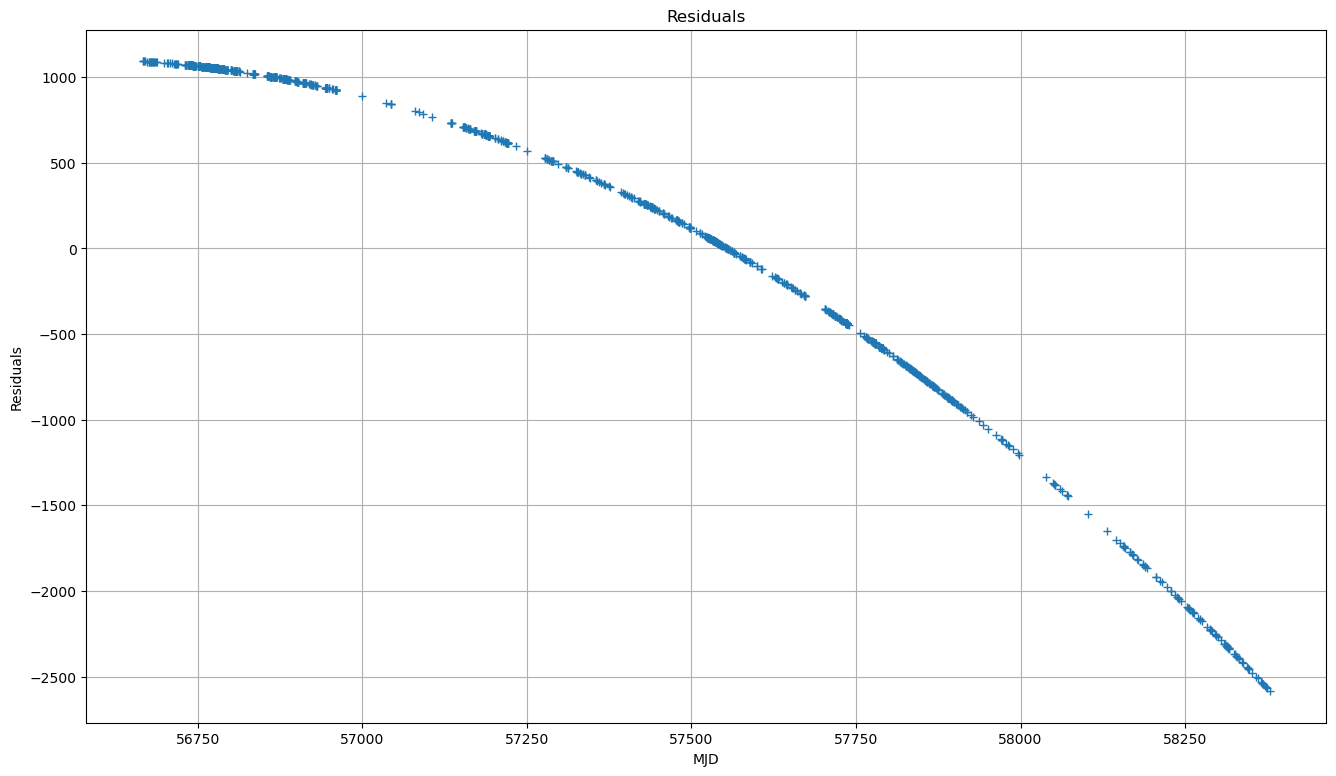

In [24]:
f.plot()

In [98]:
n=( 11.18818)*(-4.88e-21)/(-1.32540e-11**2)
print(n)

310.80309461941374
